## 单变量线性回归 

In [49]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#### header: 指定第几行作为列名(忽略注解行)，如果没有指定列名，默认header=0; 如果指定了列名header=None
names 指定列名，如果文件中不包含header的行，应该显性表示header=None

In [50]:
data=pd.read_csv("E:\\机器学习数据集\\线性回归\\ex1data1.txt",header=None,names=['Population','Profit'])
data.head(10)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [52]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


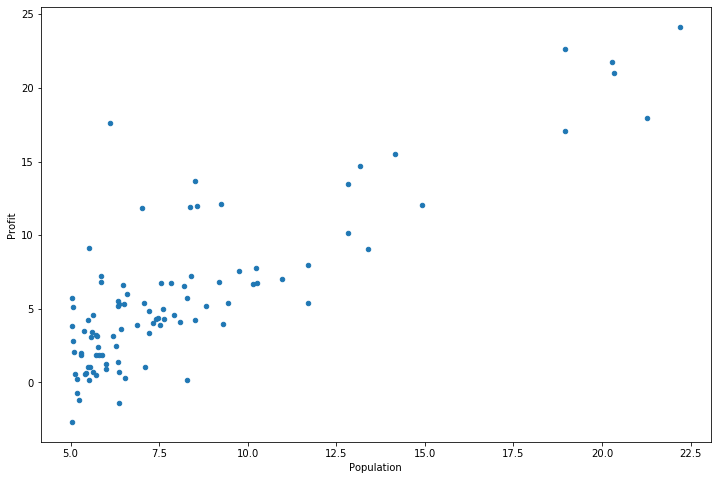

In [53]:
data.plot(kind='scatter',x='Population',y='Profit',figsize=(12,8))
plt.show()

### 使用梯度下降来实现线性回归，以最小化成本函数 

In [54]:
#定义代价函数（均方误差代价函数），其中的X*theta.T为预测函数
def computeCost(X,y,theta):
    inner=np.power(((X*theta.T)-y),2)
    return np.sum(inner) / (2*len(X))

#### df.insert(添加列位置索引序号，添加列名，数值，是否允许列名重复） 

In [55]:
#插入一列名称为ones，列中所有值为1的列，目的是与预测函数h(x)中的Θ0相乘，方便统一矩阵化的计算，hΘ(x (i))=Θ0+Θ1*x (i)
data.insert(0,'Ones',1)

In [56]:
#分割出X和y
cols=data.shape[1]  #data中所有列的数量
#iloc选取数据，包左不包右
X=data.iloc[:,0:cols-1]  #X是所有行，去掉最后一列
y=data.iloc[:,cols-1:cols] #X是所有行，最后一列

In [57]:
#观察X（训练集）和y（目标变量）是否正确
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [58]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [59]:
#代价函数是numpy矩阵，所以需要转换x和y,并初始化theta,为了方便代码的编写，将将所有的公式都转换为矩阵的形式，还有X，y，theta
X=np.matrix(X.values)
y=np.matrix(y.values)
theta =np.matrix(np.array([0,0]))

In [60]:
#查看矩阵theta
theta

matrix([[0, 0]])

In [61]:
#查看X，y，theta的维度
X.shape,theta.shape,y.shape

((97, 2), (1, 2), (97, 1))

In [62]:
#计算当theta为0时，代价函数J(x)的值
computeCost(X,y,theta)

32.072733877455676

In [63]:
#梯度迭代下降
def gradientDescent(X,y,theta,alpha,iters):
    temp=np.matrix(np.zeros(theta.shape))
    parameters=int(theta.ravel().shape[1]) #ravel函数是将多维矩阵转化为一维矩阵
    cost=np.zeros(iters)
    
    for i in range(iters):
        error=(X*theta.T)-y
        
        for j in range(parameters):
            #代价函数的梯度以及梯度的迭代
            term=np.multiply(error,X[:,j]) #两个矩阵相乘
            temp[0,j]=theta[0,j]-((alpha/len(X))*np.sum(term))
            
        theta=temp   #theta表示预测函数的系数
        cost[i]=computeCost(X,y,theta) #cost[i]表示在进行第i次迭代时，代价函数值
    return theta,cost

In [64]:
#初始化alpha和iters
alpha=0.01
iters =1000

In [65]:
#运行梯度下降算法在训练集上进行迭代得到theta拟合系数
g,cost=gradientDescent(X,y,theta,alpha,iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [66]:
#使用我们得到的拟合参数来计算训练模型的代价函数（误差）
computeCost(X,y,g)

4.515955503078914

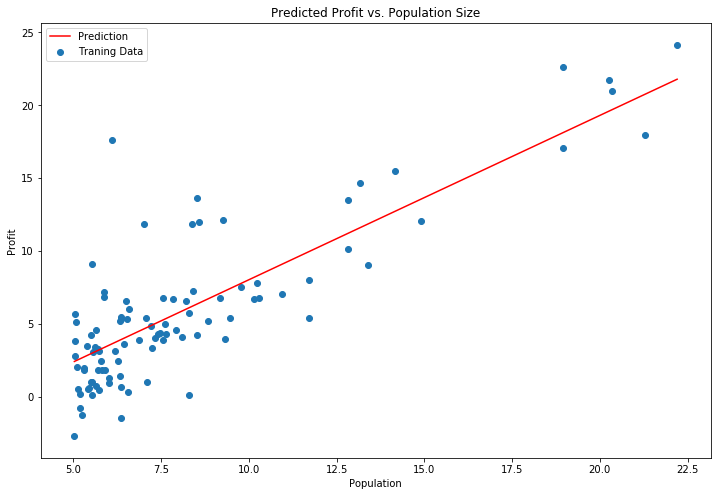

In [69]:
#绘制图形
x=np.linspace(data.Population.min(),data.Population.max(),100)
f=g[0,0]+(g[0,1]*x)#theta中的系数第一个是常数项系数，第二个是一次性系数

plt.figure(figsize=(12,8))
plt.plot(x,f,'r',label='Prediction')
plt.scatter(data.Population,data.Profit,label='Traning Data')
plt.legend(loc=2)  #此处的loc=2，就是调整图例位置到左上
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Predicted Profit vs. Population Size')
plt.show()

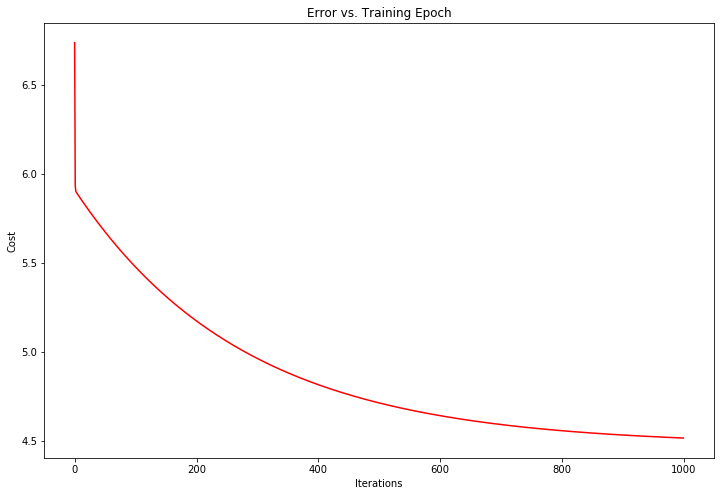

In [42]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## 多变量线性回归

In [78]:
data2=pd.read_csv("E:\机器学习数据集\线性回归\ex1data2.txt",header=None,names=['Size','Bedroom','Price'])
data2.head()

,Size,Bedroom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### 进行特征归一化处理 

数据标准化（归一化）处理是数据挖掘的一项基础工作，不同评价指标往往具有不同的量纲和量纲单位，这样的情况会影响到数据分析的结果，为了消除指标之间的量纲影响，需要进行数据标准化处理，以解决数据指标之间的可比性。原始数据经过数据标准化处理后，各指标处于同一数量级，适合进行综合对比评价。

有两种方法：1.StandardScaler，（每一列的每一个x-对应列的均值）/对应列的标准差，归一化后，矩阵每列的均值为0，标准差为1（特征值均值为0，标准差为1）；2.MinMaxScaler，它默认将每种特征的值都归一化到[0，1]之间，(x-该列的最小值)/（该列的最大值-该列的最小值），归一化后的数值大小范围是可调的（根据MinMaxScaler的参数feature_range调整）

In [79]:
data2=(data2-data2.mean())/data2.std()
data2.head()

,Size,Bedroom,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [80]:
#插入一列值均为1的列
data2.insert(0,'Ones',1)
#分隔出X2，y2
cols=data2.shape[1]
X2=data2.iloc[:,0:cols-1]
y2=data2.iloc[:,cols-1:cols]
#将X2，y2转换为矩阵,初始化theta2
X2=np.matrix(X2.values)
y2=np.matrix(y2.values)
theta2=np.matrix(np.array([0,0,0]))
#使用梯度下降迭代法得到训练集的拟合系数g2和每一次的迭代的损失函数cost2
g2,cost2=gradientDescent(X2,y2,theta2,alpha,iters)
#在得到拟合系数的情况下得到模型最终的损失函数值
computeCost(X2,y2,g2)

0.13070336960771892

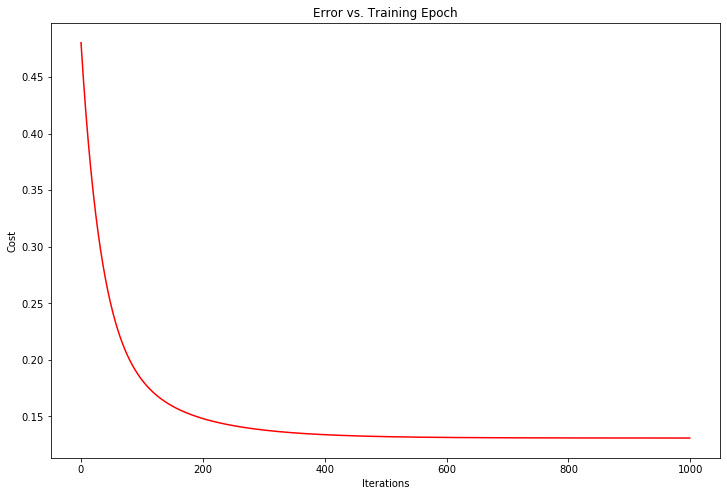

In [82]:
#查看迭代的训练过程
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost2,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## 使用sklearn库中的线性回归函数应用于data1中 

In [24]:
from sklearn.linear_model import LinearRegression

In [23]:
model=LinearRegression().fit(X,y)

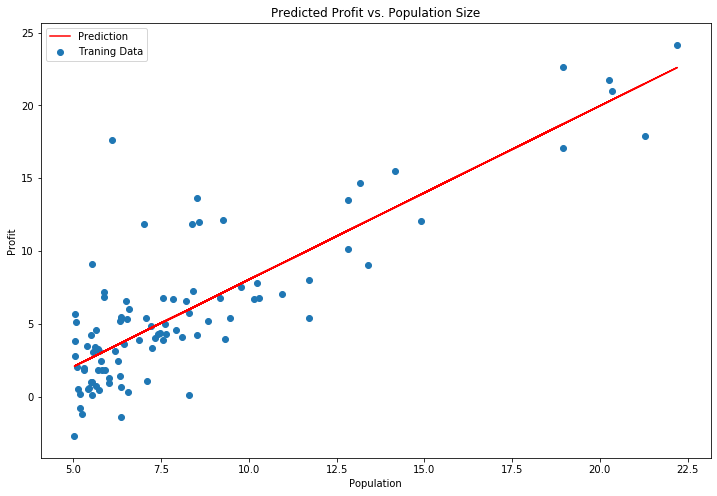

In [25]:
x=np.array(X[:,1].A1)
f=model.predict(X).flatten()

fig,ax=plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data.Population,data.Profit,label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()